In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('Student_Performance.csv')
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [3]:
print("Dataset Info:")
df.info()
print("\nDescriptive Statistics:")
display(df.describe())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB

Descriptive Statistics:


,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [4]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Encode categorical column ('Extracurricular Activities')
df = df.copy()
df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'Yes':1, 'No':0})

df.head()


Missing values per column:
Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


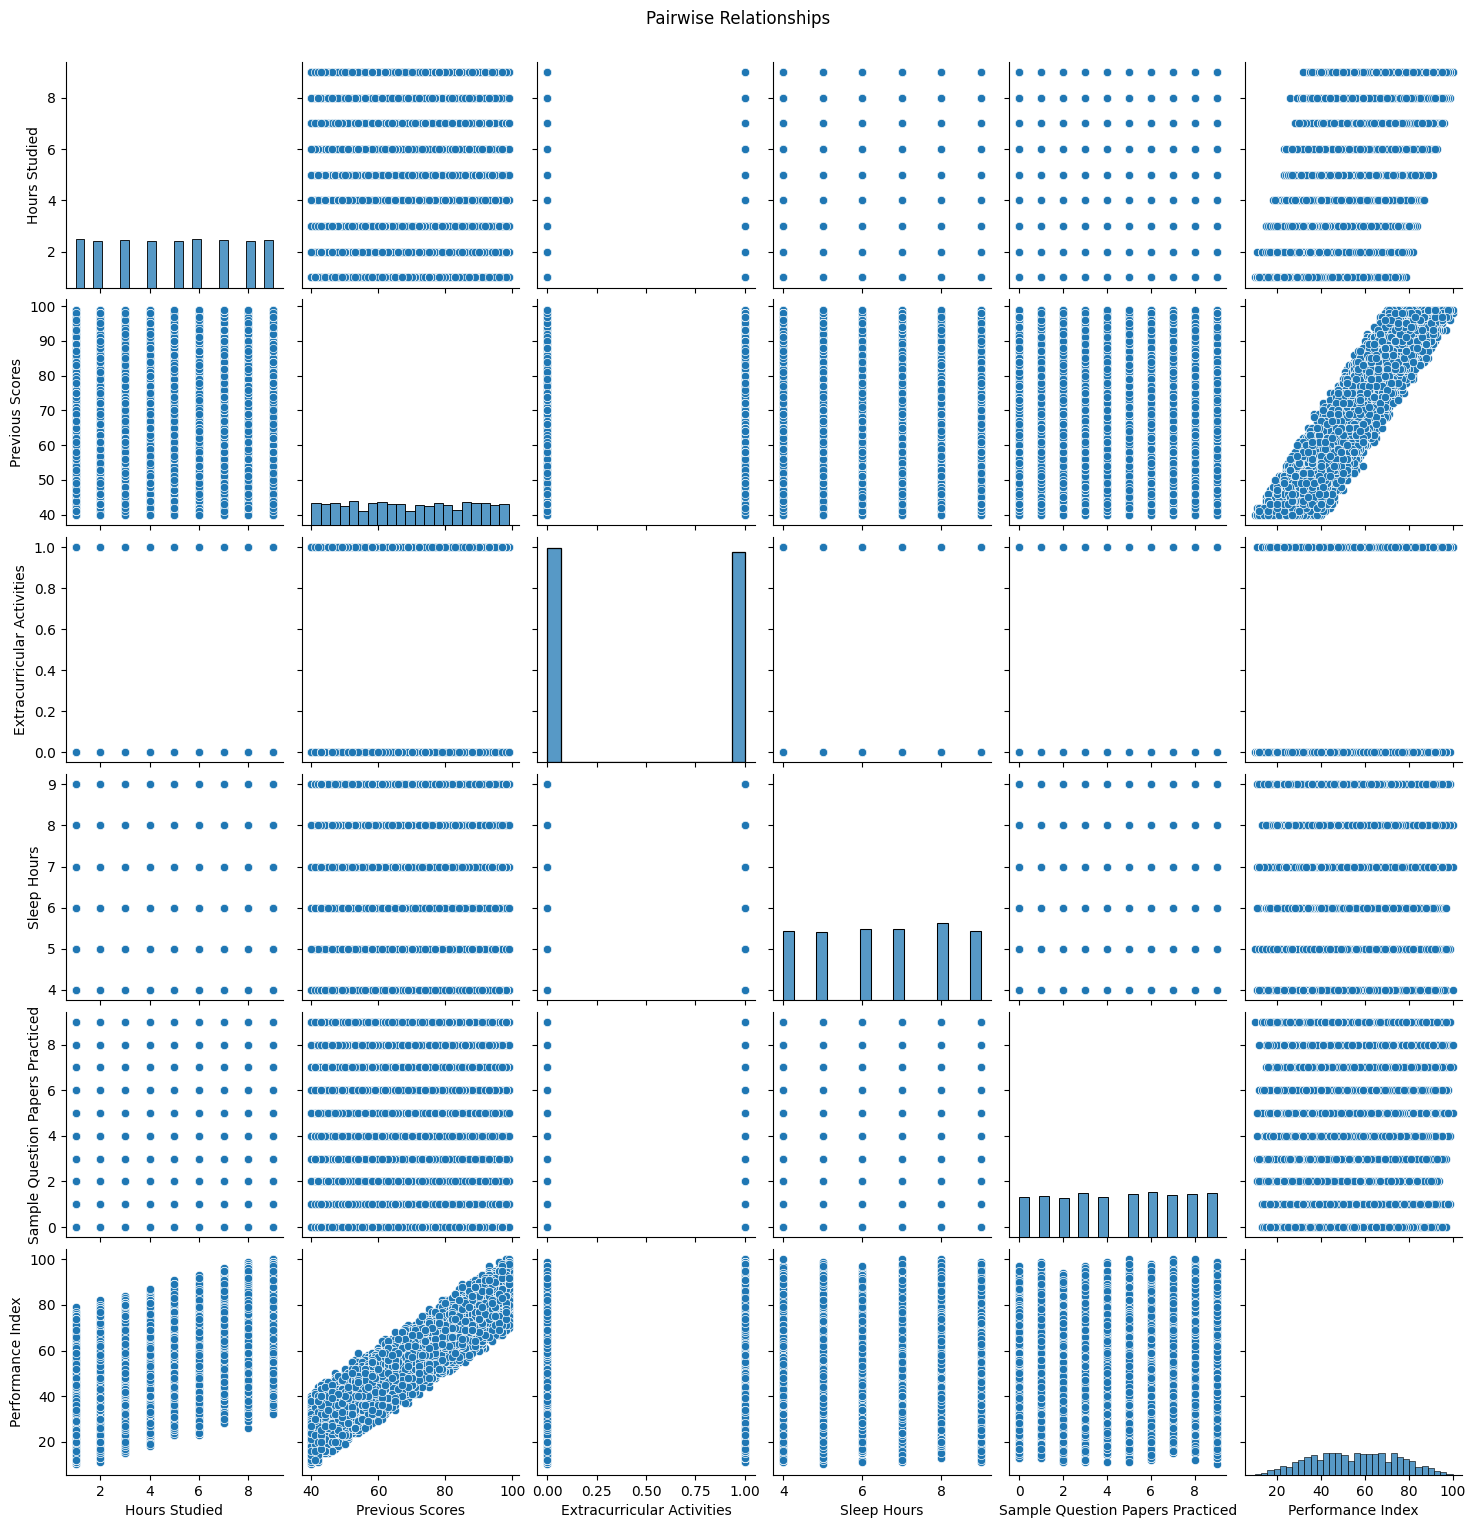

In [5]:
sns.pairplot(df)
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()

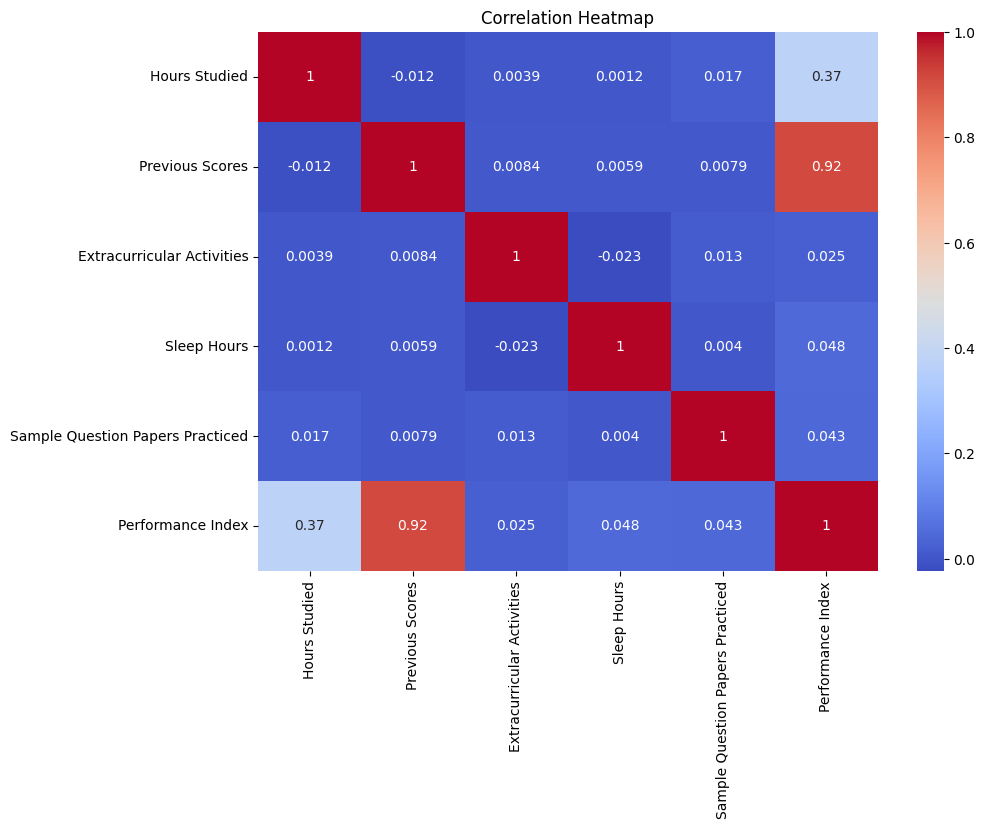

In [6]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [7]:
target = 'Performance Index'
features = [col for col in df.columns if col != target]

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")


Train shape: (8000, 5), Test shape: (2000, 5)


In [8]:
model = LinearRegression()
model.fit(X_train, y_train)
print("Model trained.")


Model trained.


In [9]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error (MSE): 4.08
R^2 Score: 0.99


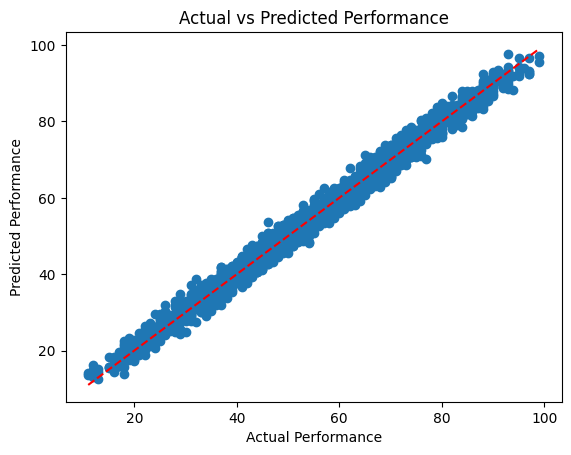

In [10]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Performance")
plt.ylabel("Predicted Performance")
plt.title("Actual vs Predicted Performance")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


In [11]:
sample_input = X_test.iloc[0:5]
sample_true = y_test.iloc[0:5].values
sample_pred = model.predict(sample_input)

for i in range(len(sample_input)):
    print(f"Input: {sample_input.iloc[i].to_dict()}\n   True: {sample_true[i]}, Predicted: {sample_pred[i]:.2f}\n")


Input: {'Hours Studied': 5, 'Previous Scores': 69, 'Extracurricular Activities': 0, 'Sleep Hours': 8, 'Sample Question Papers Practiced': 2}
   True: 51.0, Predicted: 54.71

Input: {'Hours Studied': 2, 'Previous Scores': 46, 'Extracurricular Activities': 1, 'Sleep Hours': 4, 'Sample Question Papers Practiced': 8}
   True: 20.0, Predicted: 22.62

Input: {'Hours Studied': 7, 'Previous Scores': 56, 'Extracurricular Activities': 1, 'Sleep Hours': 7, 'Sample Question Papers Practiced': 5}
   True: 46.0, Predicted: 47.90

Input: {'Hours Studied': 6, 'Previous Scores': 42, 'Extracurricular Activities': 1, 'Sleep Hours': 8, 'Sample Question Papers Practiced': 5}
   True: 28.0, Predicted: 31.29

Input: {'Hours Studied': 7, 'Previous Scores': 53, 'Extracurricular Activities': 0, 'Sleep Hours': 4, 'Sample Question Papers Practiced': 6}
   True: 41.0, Predicted: 43.00

